In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

np.random.seed(0)

# Parameters
par = np.array([10, 28, 2.66667])
dt = 0.02
tf = 100
nt = int(tf / dt + 1)
t = np.linspace(0, tf, nt)

x = np.zeros((3, nt))
x0 = np.array([-2.9708, -5.1844, 12.1317])
x[:, 0] = x0

n = 300    # Number of neurons
m = 3      # Input dimension

# Reservoir initialization
Win = 0.01 * (2.0 * np.random.rand(n, m) - 1)

A = np.zeros((n, n))        # Adjacency matrix of n neurons in reservoir
for i in range(n):
    for j in range(n):
        temp = np.random.randint(0, n)
        if temp < 6:
            A[i, j] = np.random.uniform(-0.5, 0.5)

spec = max(abs(np.linalg.eigvals(A)))
A = A / spec

r = np.zeros((n, nt))
r[:, 0] = np.random.uniform(-0.5, 0.05, n)

# Training phase to compute Wout
yt = x.copy()
l = 1e-6

for i in range(nt - 1):
    x[:, i + 1] = x[:, i] + dt * np.array([
        par[0] * (x[1, i] - x[0, i]),
        x[0, i] * (par[1] - x[2, i]) - x[1, i],
        x[0, i] * x[1, i] - par[2] * x[2, i]
    ])

    r[:, i + 1] = np.tanh(A.dot(r[:, i]) + np.matmul(Win, x[:, i]) + np.ones(n))

# Compute Wout using all training data
Wout = np.matmul(r[:, :-1], r[:, :-1].T)
Wout = np.linalg.inv(Wout + l * np.identity(n))
Wout = np.matmul(Wout, r[:, :-1])
Wout = np.matmul(Wout, yt[:, :-1].T)
Wout = np.transpose(Wout)


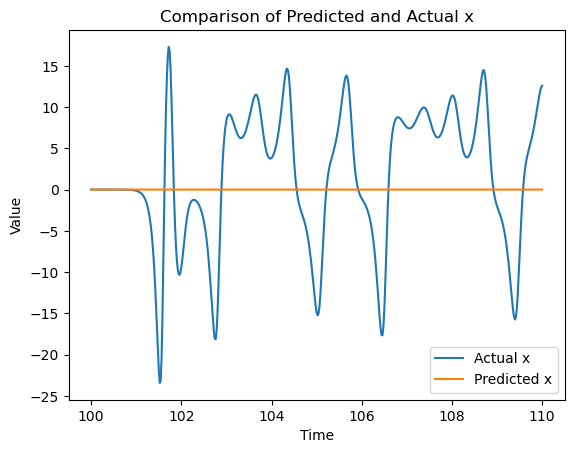

In [3]:
# Prediction phase
tf_test = 120
nt_test = int((tf_test - tf) / dt + 1)
t_test = np.linspace(tf, tf_test, nt_test)

x_test = np.zeros((3, nt_test))
x_test[:, 0] = np.matmul(Wout, r[:, -1])

r_test = np.zeros((n, nt_test))
r_test[:, 0] = r[:, -1]

ypred_test = np.zeros((3, nt_test))
ypred_test[:, 0] = x_test[:, 0]

# Prediction using Wout and r_test
for i in range(nt_test - 1):
    x_test[:, i + 1] = x_test[:, i] + dt * np.array([
        par[0] * (x_test[1, i] - x_test[0, i]),
        x_test[0, i] * (par[1] - x_test[2, i]) - x_test[1, i],
        x_test[0, i] * x_test[1, i] - par[2] * x_test[2, i]
    ])

    r_test[:, i + 1] = np.tanh(A.dot(r_test[:, i]) + np.matmul(Win, ypred_test[:, i]) + np.ones(n))
    ypred_test[:, i + 1] = np.matmul(Wout, r_test[:, i + 1])

# Plotting results
plt.figure()
plt.plot(t_test[:1000], x_test[0, :1000], label='Actual x')
plt.plot(t_test[:1000], ypred_test[0, :1000], label='Predicted x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Predicted and Actual x')
plt.show()

In [4]:
r[:, -1].shape

(300,)